In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:, 1:].dropna()

In [7]:
df.balance.describe()

count    10000.000000
mean       835.374886
std        483.714985
min          0.000000
25%        481.731105
50%        823.636973
75%       1166.308386
max       2654.322576
Name: balance, dtype: float64

In [5]:
df['default'] = np.where(df.default=='Yes', 1, 0)
df['student'] = np.where(df.student=='Yes', 1, 0)

C:\Users\JChaotogo\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [6]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


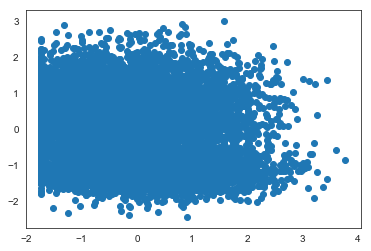

In [18]:
plt.scatter(x=df.balance, y=df.income)

In [8]:
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)
df.balance.describe()

count    1.000000e+04
mean    -1.080025e-16
std      1.000050e+00
min     -1.727085e+00
25%     -7.311361e-01
50%     -2.426739e-02
75%      6.841840e-01
max      3.760559e+00
Name: balance, dtype: float64

In [9]:
#training size is half the data
trainsize = int(df.shape[0]/2)
df_test = df.iloc[trainsize:,:].copy()
df_train = df.iloc[:trainsize, :].copy()

In [11]:
regr1 = linear_model.LinearRegression()
Y_train = df_train['income'].values.reshape(-1,1)
X_train = df_train[['default', 'student', 'balance']]

regr1.fit(X_train, Y_train)
print('R-squared value:', regr1.score(X_train, Y_train))

R-squared value: 0.573878496271703


In [12]:
origparams = np.append(regr1.coef_, regr1.intercept_)

df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

In [13]:
regrBig = linear_model.LinearRegression()

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]
regrBig.fit(X_train2, Y_train)
print('R-squared value:', regrBig.score(X_train2, Y_train))

R-squared value: 0.5739734452084748


In [14]:
newparams = np.append(regrBig.coef_[0,0:(len(origparams)-1)],regrBig.intercept_)

print('\nParameter Estimates for the same predictors for the small model '
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)


Parameter Estimates for the same predictors for the small model and large model:
[[0.014 -0.004]
 [-0.759 -0.759]
 [0.000 4157.867]
 [-0.001 553434.606]]


In [43]:
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))

0.5738739164402877


In [44]:
lass = linear_model.Lasso(alpha=.2)
lassfit = lass.fit(X_train, Y_train)
print('R-sqaured:', lass.score(X_train, Y_train))

origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('parameters:', origparams)

R-sqaured: 0.5333162041649835
parameters: [ 0.00000000e+00 -5.57540973e-01 -0.00000000e+00  8.60383749e-05]


In [58]:
lassor = {}
ridger = {}

lambdavalues = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 2, 3, 4, 5]

for lamb in lambdavalues:
    lass = linear_model.Lasso(alpha=lamb)
    lass.fit(X_train, Y_train)
    lassor[lamb] = lass.score(X_test, Y_test)
    
    ridge = linear_model.Ridge(alpha=lamb)
    ridge.fit(X_train, Y_train)
    ridger[lamb] = ridge.score(X_test, Y_test)

In [59]:
data = pd.DataFrame([lassor, ridger]).transpose()
data.columns = ['lassor', 'ridger']
data.head()

,lassor,ridger
0.1,0.555049,0.563070
0.2,0.526494,0.563070
0.3,0.477603,0.563071
0.4,0.408377,0.563071
0.5,0.318816,0.563072


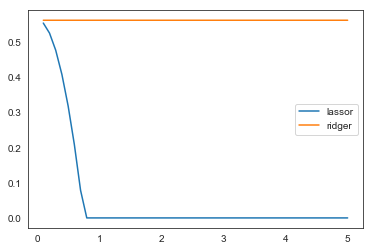

In [60]:
data.plot()
plt.show()